In [1]:
import sys
sys.path.append('../')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from machinelearning.mlpipeline import MLPipelines
from dataloader.eda import DataExplorer

%load_ext autoreload
%autoreload 2

##### Load data and initialize `MLPipelines` 

In [2]:
csv_dir = "../data/ST000369.csv"
label = "Class"

mlpipe = MLPipelines(label=label, csv_dir=csv_dir)
print(mlpipe)

Label mapping: {0: 0.0, 1: 1.0}
There is no selected classifier.
Number of rows: 80 
Number of columns: 182


##### Perform Data Exploration using `DataExplorer` 

Label mapping: {0: 0.0, 1: 1.0}
Normalization completed.


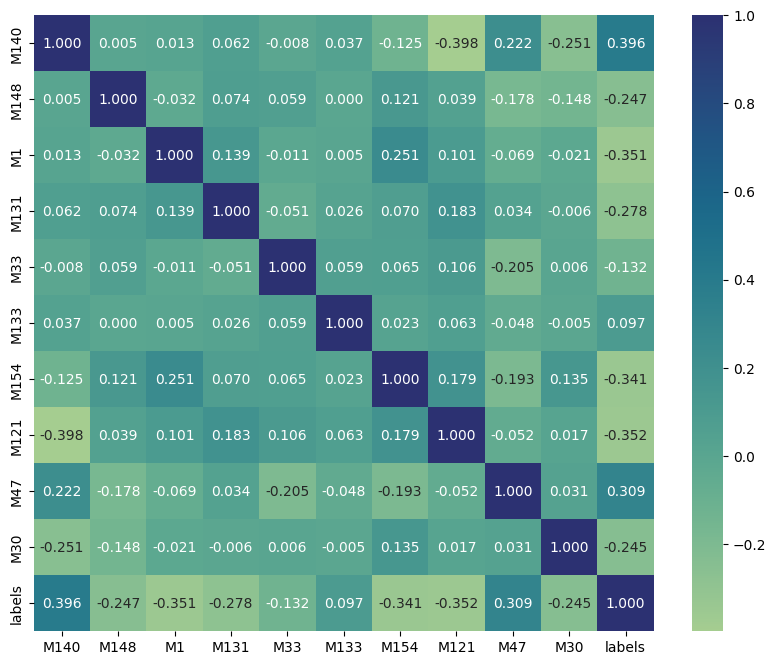

In [3]:
explorer = DataExplorer(csv_dir=csv_dir, label=label)
explorer.correlations(get_table=False, num_of_best_features=10)

In [4]:
# explorer.pairplots_function(num_of_best_features=10)

##### Perform model selection using **Nested Cross Validation**

Your Dataset contains NaN values. Some estimators may not work with NaN values.


Outer fold of 1 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 1 round: 33% |████▎        | Elapsed Time: 0:00:05 ETA:   0:00:10
Outer fold of 1 round: 66% |████████▋    | Elapsed Time: 0:00:10 ETA:   0:00:05
Outer fold of 1 round:100% |█████████████| Elapsed Time: 0:00:11 Time:  0:00:11


Finished with 1 round after 0.00 hours.
Finished with 6 estimators


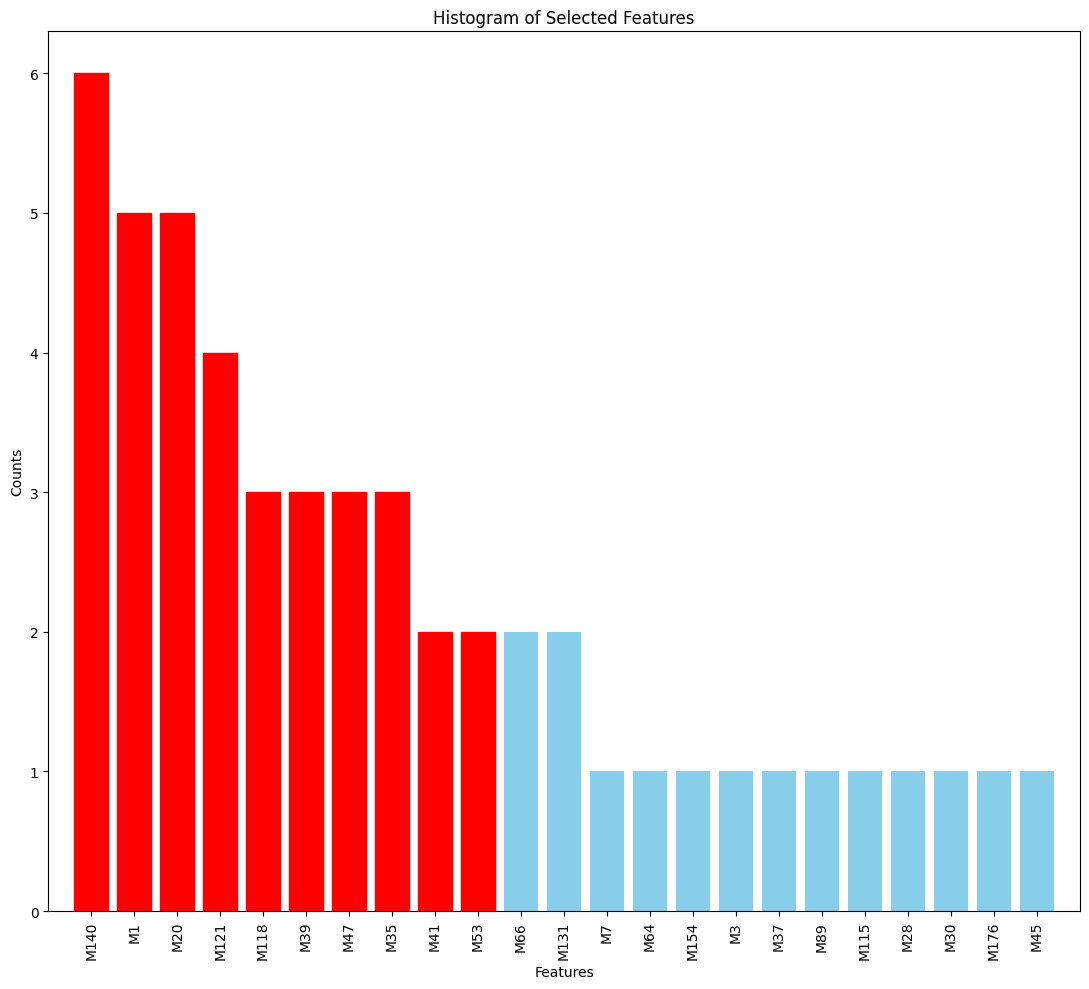

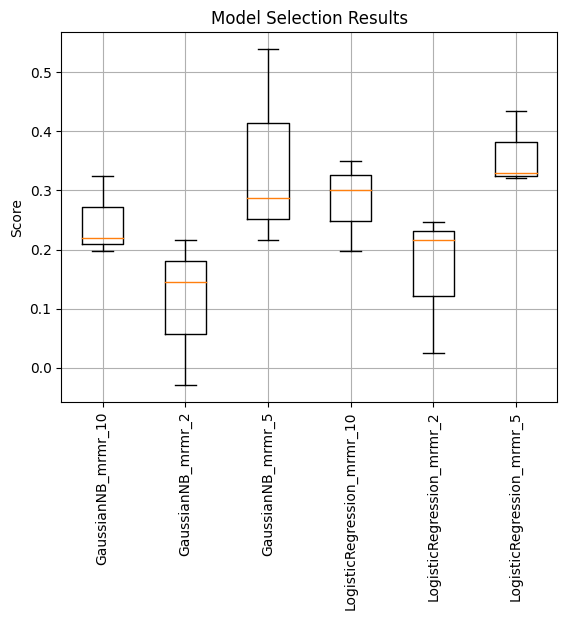

In [5]:
scores, features_list, all_featues = mlpipe.nested_cv(include=[LogisticRegression(), GaussianNB()], inner_splits=3, outer_splits=3, rounds=1, num_features=[2,5,10])

In [6]:
mlpipe.normalize()

Converting the raw data with minmax normalization method....
Normalization completed.


In [7]:
# Create a parameter grid for XGBoost classifier
param_grid = {
    'n_estimators': [3],
    'max_depth': [3],
}

# print('Training with RandomizedSearchCV:')
mlpipe.random_search(estimator=XGBClassifier(), parameter_grid=param_grid)
# print()

# print('Training with GridSearchCV:')
# mlpipe.grid_search(estimator=XGBClassifier(), parameter_grid=param_grid)

Estimator: XGBClassifier
Best parameters: {'n_estimators': 3, 'max_depth': 3}
Best matthews_corrcoef: 0.053251068776139256


  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


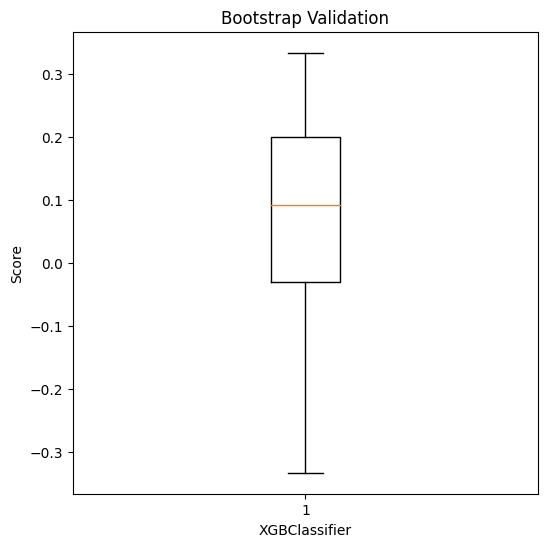

In [8]:
boot_scores = mlpipe.bootstrap_validation(n_iter=10)

In [9]:
mlpipe.bayesian_search(n_trials=3)

  0%|          | 0/3 [00:00<?, ?it/s]

[W 2024-05-10 12:08:46,256] Trial 0 failed with parameters: {'learning_rate': 0.39404635081185363, 'n_estimators': 390, 'max_depth': 46, 'min_child_weight': 8, 'gamma': 2.615106796407763, 'subsample': 0.18241388123690325, 'colsample_bytree': 0.04940815565731595, 'reg_alpha': 0.7096586246357478, 'reg_lambda': 0.23116354957747087, 'scale_pos_weight': 5.951311447553899, 'booster': 'gbtree', 'tree_method': 'auto'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/WUR/g0012069/env/main/lib/python3.10/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/home/WUR/g0012069/AI4META/notebooks/../machinelearning/mlestimator.py", line 324, in objective
    score = cross_val_score(cls, X, y, scoring=scoring, cv=cv).mean()
  File "/home/WUR/g0012069/env/main/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 562, in cross_val_score
    cv_results = cross_validate(
  Fil

KeyboardInterrupt: 